# Customer churn prediction using ANN 

Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn

Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

Demographic info about customers – gender, age range, and if they have partners and dependents

In [94]:
#import paskages 
import numpy as np
import pandas as pd 


import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix , classification_report

import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
#Load data
df= pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
#print head data 
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#drop it columns customer ID
df.drop('customerID' , axis=1 , inplace=True)

In [15]:
#shape data
df.shape

(7043, 20)

In [4]:
#print data types 
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [23]:
#convert TotalCharges dtype object to numric
pd.to_numeric(df.TotalCharges  ,errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [22]:
df[pd.to_numeric(df.TotalCharges  ,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
df[pd.to_numeric(df.TotalCharges  ,errors='coerce').isnull()].shape

(11, 20)

In [20]:
#return new dataftame 
df1 = df[df.TotalCharges!=" "]
df1.shape  #shpe data

(7032, 20)

In [21]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [24]:
#convert TotalCharges dtype object to numric
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


C:\Users\DELL\AppData\Local\Temp\ipykernel_9916\1549385254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [25]:
#data type TotalCharges
df1.TotalCharges.dtype

dtype('float64')

###### Tenure

In [26]:
df1[df1.Churn=="No"]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [27]:
df1[df1.Churn=="No"].tenure

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

In [28]:
df1[df1.Churn=="Yes"].tenure

2        2
4        2
5        8
8       28
13      49
        ..
7021    12
7026     9
7032     1
7034    67
7041     4
Name: tenure, Length: 1869, dtype: int64

In [30]:
tenure_churn_no = df1[df1.Churn=="No"].tenure
tenure_churn_yes=df1[df1.Churn=="Yes"].tenure

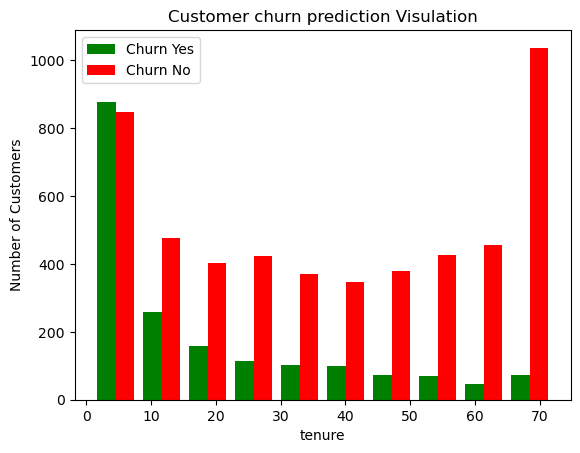

In [36]:
#hist plot Tenure 
plt.hist([tenure_churn_yes , tenure_churn_no] , color=['green','red']   ,label=['Churn Yes', 'Churn No'])
plt.xlabel("tenure")
plt.ylabel('Number of Customers')
plt.title("Customer churn prediction Visulation")

plt.legend()
plt.show()

In [ ]:
df1.MonthlyCharges

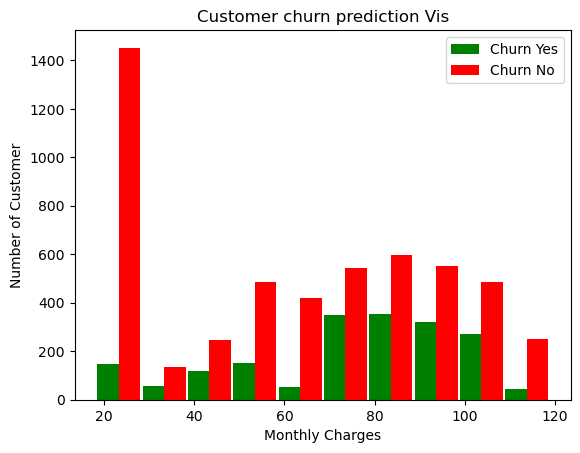

In [37]:
mc_churn_no = df1[df1.Churn=="No"].MonthlyCharges
mc_churn_yes = df1[df1.Churn=="Yes"].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customer")
plt.title("Customer churn prediction Vis")

lood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes , mc_churn_no],rwidth=0.95 , color=['green','red'] , label=['Churn Yes' ,'Churn No'])
plt.legend()
plt.show()

### Label Encoding

In [38]:
#print name columns 
for column in df:
    print(column)

gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


In [45]:
#print unique value in data
for column in df:
    print(f'{column} : {df[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2

In [47]:
#print unique value in data category
for column in df:
    if df1[column].dtypes=='object':
        print(f'{column} : {df[column].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [49]:
#function print unique value in data category
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column} : {df[column].unique()}')

In [50]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [52]:
#exist mnay Synonyms
# so will replace No internet service by No 
df1.replace("No internet service","No",inplace=True)
df1.replace("No phone service","No",inplace=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_9916\3493868230.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No internet service","No",inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_9916\3493868230.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No phone service","No",inplace=True)


In [53]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


###### Replace Yes and No to 1 or 0

In [58]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9916\1648037665.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)


In [56]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9916\698335744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [59]:
df1.gender.unique

<bound method Series.unique of 0       1
1       0
2       0
3       0
4       1
       ..
7038    0
7039    1
7040    1
7041    0
7042    0
Name: gender, Length: 7032, dtype: int64>

In [61]:
# one-hot encoding categorical
df2 = pd.get_dummies(data=df1 , columns=['InternetService','Contract','PaymentMethod'])
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [62]:
df2.columns


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [63]:
#sample data 
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2628,1,0,0,0,1,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
6126,0,1,0,0,19,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
5363,0,0,1,1,70,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2670,1,0,1,1,51,1,1,1,0,0,...,0,1,0,0,1,0,0,0,0,1
3127,1,0,0,0,29,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0


In [64]:
#data types 
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [67]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

### Train test split

In [69]:
X = df2.drop("Churn" , axis=1)
y = df2['Churn']

In [70]:
#split data 
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=5)

In [72]:
#shape split train data
print(X_train.shape , y_train.shape)

(5625, 26) (5625,)


In [73]:
#shape split test data
print(X_test.shape , y_test.shape)

(1407, 26) (1407,)


In [75]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


### Build a model (ANN) 

In [81]:
model = keras.Sequential([
    keras.layers.Dense(26 , input_shape=(26,) , activation='relu'),
    keras.layers.Dense(15 , activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

#Compile model 
model.compile( optimizer='adam' ,
              loss='binary_crossentropy',
             metrics=['accuracy'])

#fit model 

model.fit(X_train , y_train , epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.4893 - accuracy: 0.7630
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4250 - accuracy: 0.7945
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4188 - accuracy: 0.7977
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4158 - accuracy: 0.8014
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4143 - accuracy: 0.8041
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4112 - accuracy: 0.8073
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4096 - accuracy: 0.8092
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4080 - accuracy: 0.8091
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4059 - accuracy: 0.8092
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4047 - accura

176/176 [==============================] - 0s 2ms/step - loss: 0.3562 - accuracy: 0.8373
Epoch 82/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3560 - accuracy: 0.8347
Epoch 83/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3567 - accuracy: 0.8332
Epoch 84/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3544 - accuracy: 0.8366
Epoch 85/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3554 - accuracy: 0.8352
Epoch 86/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3544 - accuracy: 0.8364
Epoch 87/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3536 - accuracy: 0.8377
Epoch 88/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3530 - accuracy: 0.8388
Epoch 89/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3532 - accuracy: 0.8352
Epoch 90/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3519 - accuracy: 

In [91]:
#evaluate
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4961 - accuracy: 0.7754


[0.49606794118881226, 0.7754086852073669]

In [84]:
#predict
yp = model.predict(X_test)

44/44 [==============================] - 0s 1ms/step


In [85]:
yp[:5]

array([[3.1846407e-01],
       [2.4756341e-01],
       [2.4181449e-04],
       [8.4474051e-01],
       [4.5804000e-01]], dtype=float32)

In [87]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [88]:
y_pred =[]
for element in yp:
    if element >0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [89]:
y_pred[:5]

[0, 0, 0, 1, 0]

In [93]:
#classificationn report 
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       999
           1       0.64      0.53      0.58       408

    accuracy                           0.78      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.77      0.78      0.77      1407



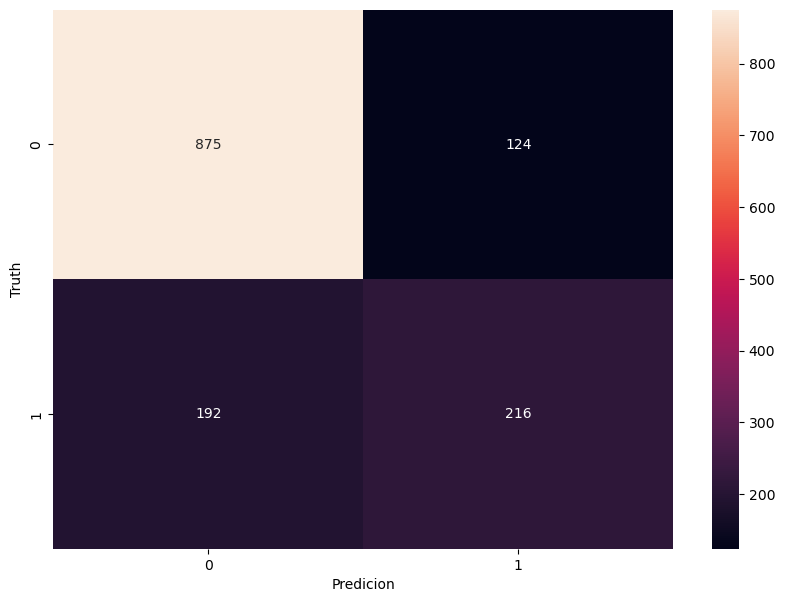

In [96]:
#confusion matrix
cm = tf.math.confusion_matrix(labels=y_test , predictions=y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm ,annot=True ,fmt='d')

plt.xlabel("Predicion")
plt.ylabel("Truth")
plt.show()